<a href="https://colab.research.google.com/github/Endalebob/Deep-Learning-Lab/blob/main/human_pose_estimation_by_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Endale Yohannes**  
**ID N0: UGR/7379/12**

# Project Description: Pose Estimation using PyTorch
In this project, I embarked on the fascinating domain of Pose Estimation utilizing the powerful PyTorch framework. Pose Estimation involves the task of predicting key points or joints in an image, allowing us to understand and analyze the human body's posture.

**Methodology:**

To expedite the development process and leverage the advancements made by the research community, I opted to build upon previous work in the field. Specifically, I utilized a pre-trained Pose Estimation model and fine-tuned it to suit the specific requirements of my project.

**Model Architecture:**

The backbone of the Pose Estimation model is a Convolutional Neural Network (CNN), a type of deep learning architecture adept at extracting hierarchical features from images. The chosen architecture provides a robust foundation for identifying key points on the human body.

**Pre-trained Model:**

For the initial model, I employed a pre-trained Pose Estimation model available in the PyTorch model. This allowed me to benefit from the extensive training and optimization carried out on large datasets.


**Multi-scale Inference:**

Understanding that people might appear at different scales in images, I implemented multi-scale inference during the testing phase. This approach involves predicting key points at various scales, leading to improved results.

**Results:**

The model successfully predicted key points on the human body, forming a skeletal structure that outlines the posture. Visualization techniques, such as linking joints and drawing key points, were applied to enhance the interpretability of the results.

**Conclusion:**

This project presents an exploration into the realm of Pose Estimation using PyTorch, leveraging existing research and models to build a robust solution. The combination of pre-trained models, and multi-scale inference contributed to the project's success in accurately predicting human poses.

As I submit this work, I reflect on the learning experience gained from tackling a complex computer vision task and the satisfaction derived from witnessing the model effectively capture the intricacies of human body postures.

# Open Pose Steps

**Pose Estimation with Openpose in PyTorch:**

- **Introduction:**
  - Openpose is a cutting-edge, realtime multi-person pose estimation system pioneered by Carnegie Mellon University.
  - It serves a crucial role in various domains, such as action recognition, motion capture, and sports applications.

- **Bottom-Up Approach:**
  - Openpose employs a bottom-up approach, distinguishing itself from top-down methods.
  - Unlike top-down approaches where runtime is proportional to the number of people, the bottom-up approach decouples runtime complexity from the number of individuals.
  - This unique approach ensures high accuracy while maintaining realtime performance.

- **Key Features:**
  - Enables realtime multi-person pose estimation.
  - Widely applicable in diverse fields, including action recognition and sports.

- **Learn More:**
  - Detailed insights into Openpose can be explored in the [CVPR'17 paper](https://arxiv.org/abs/1611.08050).


- **Project Implementation:**
  - The project involves building pose estimation using PyTorch.

**Net Prediction in Deep Learning:**

- **Overview:**
  - The neural net plays a pivotal role in predicting the part confidence map (heatmap) and part affinity field (PAF) maps based on the input image.

- **Architectural Features:**
  - Utilizes a two-branch multi-stage Convolutional Neural Network (CNN) for effective prediction.
  - The architecture is designed to handle the complexity of generating confidence maps and affinity fields.

- **Key Components:**
  - **Part Confidence Map (Heatmap):**
    - Predicts the likelihood of the presence of body parts in the input image.

  - **Part Affinity Field (PAF) Maps:**
    - Generates maps indicating the relationships between different body parts.

- **Architecture Details:**
  - Detailed insights into the neural net's architecture, including its two-branch multi-stage CNN, contribute to a comprehensive understanding of its functionality.

- **Enhanced Predictive Capabilities:**
  - The neural net's design enhances its predictive capabilities, providing valuable insights into part confidence and body part relationships.

- **Visual Representation:**
  - A visual representation of the architecture enhances clarity and comprehension of the net prediction process. 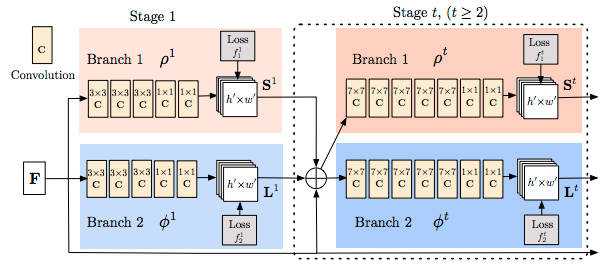

**Understanding 2D Confidence Maps and Part Affinity Field Maps:**

- **2D Confidence Maps (Top Branch):**
  - Represent the precise locations of body parts within the image.
  - Consists of 19 confidence maps, where 18 correspond to distinct body parts, and the 19th depicts the background.

- **Part Affinity Field Maps (Bottom Branch):**
  - Encode 2D vectors associated with a specific limb in the body.
  - Comprises 38 PAF maps, providing both x and y directions for each of the 19 limbs in total.

- **Map Breakdown:**
  - **Confidence Maps:**
    - 18 maps for individual body parts.
    - 1 map for the background.

  - **PAF Maps:**
    - 38 maps, representing x and y vectors for each limb.

- **Illustrative Skeleton on COCO Dataset:**
  - A visual representation of the skeleton on the COCO dataset is provided in the figure below.
  - The figure aids in understanding the indices of body parts and pairs associated with the confidence map and PAF map.

- **Indexing Correspondence:**
  - The confidence map and PAF map are intricately indexed to correlate with each other.
  - This indexing ensures that the information about body parts and their corresponding limb vectors is appropriately aligned.

- **COCO Dataset Skeleton:**
  - The figure serves as a reference, outlining the skeletal structure in the COCO dataset, highlighting the connections between different body parts and limbs. 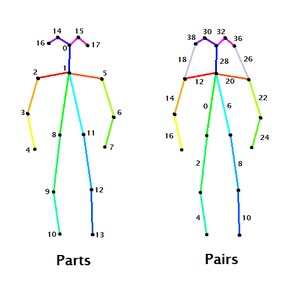

**Iterative Prediction Architecture in Human Pose Estimation:**

- **Feature Extraction:**
  - The input image undergoes processing through a convolutional network, generating a set of feature maps.

- **Refinement Stages:**
  - Feature maps enter refinement stages, forming an iterative prediction architecture.
  - Each stage produces a set of detection confidence maps and a set of part affinity fields.

- **Iterative Prediction Process:**
  - The iterative nature of the prediction involves refining initial estimates through multiple stages.
  - As more refinement stages are executed, the predictions become increasingly accurate.

- **CMU Implementation:**
  - The original implementation by Carnegie Mellon University (CMU) employs a VGG-19 backbone for feature extraction.
  - After the initial estimation of heatmaps and part affinity fields, five refinement stages are executed.

- **Lightweight Alternative:**
  - Daniil Osokin introduced a lightweight version of OpenPose using MobileNet as the backbone.
  - This alternative features a single prediction branch for the refinement stages.
  - With only 4.1 million parameters and 9 billion GFLOPS complexity, it maintains decent quality and robustness.

- **Osokin's Proposal:**
  - Daniil Osokin's approach is documented in the paper [here](https://arxiv.org/pdf/1811.12004.pdf).
  - The lightweight model's [code and pre-trained model](https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch) are accessible on GitHub.

- **Project Implementation Choice:**
  - In this specific project, the CMU version of networks is utilized, adhering to the original OpenPose implementation.

- **Architectural Comparison:**
  - The choice between CMU's VGG-19 and Osokin's MobileNet reflects a balance between computational complexity, parameter count, and the desired level of quality and robustness.


In [31]:
# Import necessary libraries
import os
import cv2
import sys
import math
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from torch.autograd import Variable

from scipy.ndimage.filters import gaussian_filter

# Enable inline plotting in Jupyter notebooks
%matplotlib inline
# Set the figure format for better display
%config InlineBackend.figure_format = 'retina'


<ipython-input-31-64f3d9d1e726>:21: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [32]:
# limb_seq: Specifies the connections between body parts to be used for pose estimation.
# map_ids: Corresponds middle joints to heatmap IDs, providing accurate joint representation.
# colors: RGB values representing distinct colors for visualization of 18 body points.

# Define the sequence of connections between body parts
limb_seq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10],
            [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17],
            [1, 16], [16, 18], [3, 17], [6, 18]]

# Define the correspondence of middle joints to heatmap IDs
map_ids = [[31, 32], [39, 40], [33, 34], [35, 36], [41, 42], [43, 44], [19, 20], [21, 22],
           [23, 24], [25, 26], [27, 28], [29, 30], [47, 48], [49, 50], [53, 54], [51, 52],
           [55, 56], [37, 38], [45, 46]]

# Define colors for the 18 body points
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0],
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255],
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]


In [33]:
class PoseEstimation(nn.Module):
    def __init__(self, model_dict):
        """
        Initializes the PoseEstimation model.

        Parameters:
        - model_dict (dict): Dictionary containing the sub-models for different blocks.
        """
        super(PoseEstimation, self).__init__()

        # Extracting sub-models from the provided dictionary
        self.model0 = model_dict['block_0']
        self.model1_1 = model_dict['block1_1']
        self.model2_1 = model_dict['block2_1']
        self.model3_1 = model_dict['block3_1']
        self.model4_1 = model_dict['block4_1']
        self.model5_1 = model_dict['block5_1']
        self.model6_1 = model_dict['block6_1']

        self.model1_2 = model_dict['block1_2']
        self.model2_2 = model_dict['block2_2']
        self.model3_2 = model_dict['block3_2']
        self.model4_2 = model_dict['block4_2']
        self.model5_2 = model_dict['block5_2']
        self.model6_2 = model_dict['block6_2']

    def forward(self, x):
        """
        Defines the forward pass of the PoseEstimation model.

        Parameters:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensors for two branches of the model.
        """
        out1 = self.model0(x)

        out1_1 = self.model1_1(out1)
        out1_2 = self.model1_2(out1)
        out2 = torch.cat([out1_1, out1_2, out1], 1)

        out2_1 = self.model2_1(out2)
        out2_2 = self.model2_2(out2)
        out3 = torch.cat([out2_1, out2_2, out1], 1)

        out3_1 = self.model3_1(out3)
        out3_2 = self.model3_2(out3)
        out4 = torch.cat([out3_1, out3_2, out1], 1)

        out4_1 = self.model4_1(out4)
        out4_2 = self.model4_2(out4)
        out5 = torch.cat([out4_1, out4_2, out1], 1)

        out5_1 = self.model5_1(out5)
        out5_2 = self.model5_2(out5)
        out6 = torch.cat([out5_1, out5_2, out1], 1)

        out6_1 = self.model6_1(out6)
        out6_2 = self.model6_2(out6)

        return out6_1, out6_2


In [34]:
def make_layers(layer_dict):
    """
    Creates a sequence of layers based on the provided layer dictionary.

    Parameters:
    - layer_dict (list): List of dictionaries, each specifying a layer.

    Returns:
    - nn.Sequential: Sequential container for the defined layers.
    """
    layers = []

    for i in range(len(layer_dict) - 1):
        layer = layer_dict[i]
        for k in layer:
            v = layer[k]
            if 'pool' in k:
                layers += [nn.MaxPool2d(kernel_size=v[0], stride=v[1], padding=v[2])]
            else:
                conv2d = nn.Conv2d(in_channels=v[0], out_channels=v[1], kernel_size=v[2], stride=v[3], padding=v[4])
                layers += [conv2d, nn.ReLU(inplace=True)]

    # Add the last layer separately
    layer = list(layer_dict[-1].keys())
    k = layer[0]
    v = layer_dict[-1][k]
    conv2d = nn.Conv2d(in_channels=v[0], out_channels=v[1], kernel_size=v[2], stride=v[3], padding=v[4])
    layers += [conv2d]

    return nn.Sequential(*layers)


def get_pose_model():
    """
    Constructs and returns the PoseEstimation model.

    Returns:
    - PoseEstimation: Instance of the PoseEstimation model.
    """
    blocks = {}

    block_0 = [{'conv1_1': [3, 64, 3, 1, 1]}, {'conv1_2': [64, 64, 3, 1, 1]}, {'pool1_stage1': [2, 2, 0]},
               {'conv2_1': [64, 128, 3, 1, 1]}, {'conv2_2': [128, 128, 3, 1, 1]}, {'pool2_stage1': [2, 2, 0]},
               {'conv3_1': [128, 256, 3, 1, 1]}, {'conv3_2': [256, 256, 3, 1, 1]}, {'conv3_3': [256, 256, 3, 1, 1]},
               {'conv3_4': [256, 256, 3, 1, 1]}, {'pool3_stage1': [2, 2, 0]}, {'conv4_1': [256, 512, 3, 1, 1]},
               {'conv4_2': [512, 512, 3, 1, 1]}, {'conv4_3_CPM': [512, 256, 3, 1, 1]},
               {'conv4_4_CPM': [256, 128, 3, 1, 1]}]

    blocks['block1_1'] = [{'conv5_1_CPM_L1': [128, 128, 3, 1, 1]}, {'conv5_2_CPM_L1': [128, 128, 3, 1, 1]},
                          {'conv5_3_CPM_L1': [128, 128, 3, 1, 1]}, {'conv5_4_CPM_L1': [128, 512, 1, 1, 0]},
                          {'conv5_5_CPM_L1': [512, 38, 1, 1, 0]}]

    blocks['block1_2'] = [{'conv5_1_CPM_L2': [128, 128, 3, 1, 1]}, {'conv5_2_CPM_L2': [128, 128, 3, 1, 1]},
                          {'conv5_3_CPM_L2': [128, 128, 3, 1, 1]}, {'conv5_4_CPM_L2': [128, 512, 1, 1, 0]},
                          {'conv5_5_CPM_L2': [512, 19, 1, 1, 0]}]

    for i in range(2, 7):
        blocks['block%d_1' % i] = [{'Mconv1_stage%d_L1' % i: [185, 128, 7, 1, 3]},
                                   {'Mconv2_stage%d_L1' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv3_stage%d_L1' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv4_stage%d_L1' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv5_stage%d_L1' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv6_stage%d_L1' % i: [128, 128, 1, 1, 0]},
                                   {'Mconv7_stage%d_L1' % i: [128, 38, 1, 1, 0]}]
        blocks['block%d_2' % i] = [{'Mconv1_stage%d_L2' % i: [185, 128, 7, 1, 3]},
                                   {'Mconv2_stage%d_L2' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv3_stage%d_L2' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv4_stage%d_L2' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv5_stage%d_L2' % i: [128, 128, 7, 1, 3]},
                                   {'Mconv6_stage%d_L2' % i: [128, 128, 1, 1, 0]},
                                   {'Mconv7_stage%d_L2' % i: [128, 19, 1, 1, 0]}]

    layers = []
    for block in block_0:
        for key in block:
            v = block[key]
            if 'pool' in key:
                layers += [nn.MaxPool2d(kernel_size=v[0], stride=v[1], padding=v[2])]
            else:
                conv2d = nn.Conv2d(in_channels=v[0], out_channels=v[1], kernel_size=v[2], stride=v[3], padding=v[4])
                layers += [conv2d, nn.ReLU(inplace=True)]

    models = {
        'block_0': nn.Sequential(*layers)
    }

    for k in blocks:
        v = blocks[k]
        models[k] = make_layers(v)

    return PoseEstimation(models)


In [35]:
def get_paf_and_heatmap(model, img_raw, scale_search, param_stride=8, box_size=368):
    """
    Computes PAF (Part Affinity Field) and heatmap predictions for a given image.

    Parameters:
    - model (PoseEstimation): PoseEstimation model.
    - img_raw (numpy.ndarray): Raw input image.
    - scale_search (list): List of scales for multi-scale inference.
    - param_stride (int): Stride parameter for padding.
    - box_size (int): Size of the bounding box.

    Returns:
    - tuple: PAF and heatmap predictions.
    """
    multiplier = [scale * box_size / img_raw.shape[0] for scale in scale_search]

    heatmap_avg = torch.zeros((len(multiplier), 19, img_raw.shape[0], img_raw.shape[1])).cuda()
    paf_avg = torch.zeros((len(multiplier), 38, img_raw.shape[0], img_raw.shape[1])).cuda()

    for i, scale in enumerate(multiplier):
        img_test = cv2.resize(img_raw, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
        img_test_pad, pad = pad_right_down_corner(img_test, param_stride, param_stride)
        img_test_pad = np.transpose(np.float32(img_test_pad[:, :, :, np.newaxis]), (3, 2, 0, 1)) / 256 - 0.5

        feed = Variable(torch.from_numpy(img_test_pad)).cuda()
        output1, output2 = model(feed)

        heatmap = nn.UpsamplingBilinear2d((img_raw.shape[0], img_raw.shape[1])).cuda()(output2)
        paf = nn.UpsamplingBilinear2d((img_raw.shape[0], img_raw.shape[1])).cuda()(output1)

        heatmap_avg[i] = heatmap[0].data
        paf_avg[i] = paf[0].data

    heatmap_avg = torch.transpose(torch.transpose(torch.squeeze(torch.mean(heatmap_avg, 0)), 0, 1), 1, 2).cuda()
    heatmap_avg = heatmap_avg.cpu().numpy()

    paf_avg = torch.transpose(torch.transpose(torch.squeeze(torch.mean(paf_avg, 0)), 0, 1), 1, 2).cuda()
    paf_avg = paf_avg.cpu().numpy()

    return paf_avg, heatmap_avg


def extract_heatmap_info(heatmap_avg, param_thre1=0.1):
    """
    Extracts information from the heatmap predictions.

    Parameters:
    - heatmap_avg (numpy.ndarray): Heatmap predictions.
    - param_thre1 (float): Threshold for heatmap peaks.

    Returns:
    - list: List of detected peaks for each body part.
    """
    all_peaks = []
    peak_counter = 0

    for part in range(18):
        map_ori = heatmap_avg[:, :, part]
        map_gau = gaussian_filter(map_ori, sigma=3)

        map_left = np.zeros(map_gau.shape)
        map_left[1:, :] = map_gau[:-1, :]
        map_right = np.zeros(map_gau.shape)
        map_right[:-1, :] = map_gau[1:, :]
        map_up = np.zeros(map_gau.shape)
        map_up[:, 1:] = map_gau[:, :-1]
        map_down = np.zeros(map_gau.shape)
        map_down[:, :-1] = map_gau[:, 1:]

        peaks_binary = np.logical_and.reduce(
            (map_gau >= map_left, map_gau >= map_right, map_gau >= map_up,
             map_gau >= map_down, map_gau > param_thre1))

        peaks = zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0])  # note reverse
        peaks = list(peaks)
        peaks_with_score = [x + (map_ori[x[1], x[0]],) for x in peaks]
        ids = range(peak_counter, peak_counter + len(peaks))
        peaks_with_score_and_id = [peaks_with_score[i] + (ids[i],) for i in range(len(ids))]

        all_peaks.append(peaks_with_score_and_id)
        peak_counter += len(peaks)

    return all_peaks


In [36]:
def extract_paf_info(img_raw, paf_avg, all_peaks, param_thre2=0.05, param_thre3=0.5):
    """
    Extracts information from the PAF predictions.

    Parameters:
    - img_raw (numpy.ndarray): Raw input image.
    - paf_avg (numpy.ndarray): PAF predictions.
    - all_peaks (list): List of detected peaks for each body part.
    - param_thre2 (float): Threshold for PAF peaks.
    - param_thre3 (float): Threshold for connection candidates.

    Returns:
    - tuple: Special keypoints and connection information.
    """
    connection_all = []
    special_k = []
    mid_num = 10

    for k in range(len(map_ids)):
        score_mid = paf_avg[:, :, [x - 19 for x in map_ids[k]]]
        candA = all_peaks[limb_seq[k][0] - 1]
        candB = all_peaks[limb_seq[k][1] - 1]
        nA = len(candA)
        nB = len(candB)

        if nA != 0 and nB != 0:
            connection_candidate = []
            for i in range(nA):
                for j in range(nB):
                    vec = np.subtract(candB[j][:2], candA[i][:2])
                    norm = math.sqrt(vec[0] * vec[0] + vec[1] * vec[1])
                    vec = np.divide(vec, norm)

                    startend = zip(np.linspace(candA[i][0], candB[j][0], num=mid_num),
                                   np.linspace(candA[i][1], candB[j][1], num=mid_num))
                    startend = list(startend)

                    vec_x = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0]
                                      for I in range(len(startend))])
                    vec_y = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1]
                                      for I in range(len(startend))])

                    score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                    score_with_dist_prior = sum(score_midpts) / len(score_midpts)
                    score_with_dist_prior += min(0.5 * img_raw.shape[0] / norm - 1, 0)

                    criterion1 = len(np.nonzero(score_midpts > param_thre2)[0]) > 0.8 * len(score_midpts)
                    criterion2 = score_with_dist_prior > 0
                    if criterion1 and criterion2:
                        connection_candidate.append(
                            [i, j, score_with_dist_prior, score_with_dist_prior + candA[i][2] + candB[j][2]])

            connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
            connection = np.zeros((0, 5))
            for c in range(len(connection_candidate)):
                i, j, s = connection_candidate[c][0:3]
                if i not in connection[:, 3] and j not in connection[:, 4]:
                    connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                    if len(connection) >= min(nA, nB):
                        break

            connection_all.append(connection)
        else:
            special_k.append(k)
            connection_all.append([])

    return special_k, connection_all


In [37]:
def get_subsets(connection_all, special_k, all_peaks):
    """
    Creates subsets by connecting body parts.

    Parameters:
    - connection_all (list): List containing connection information.
    - special_k (list): List of special keypoints.
    - all_peaks (list): List of detected peaks for each body part.

    Returns:
    - tuple: Subsets and candidate information.
    """
    subset = -1 * np.ones((0, 20))
    candidate = np.array([item for sublist in all_peaks for item in sublist])

    for k in range(len(map_ids)):
        if k not in special_k:
            partAs = connection_all[k][:, 0]
            partBs = connection_all[k][:, 1]
            indexA, indexB = np.array(limb_seq[k]) - 1

            for i in range(len(connection_all[k])):
                found = 0
                subset_idx = [-1, -1]
                for j in range(len(subset)):
                    if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                        subset_idx[found] = j
                        found += 1

                if found == 1:
                    j = subset_idx[0]
                    if subset[j][indexB] != partBs[i]:
                        subset[j][indexB] = partBs[i]
                        subset[j][-1] += 1
                        subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
                elif found == 2:
                    j1, j2 = subset_idx
                    membership = ((subset[j1] >= 0).astype(int) + (subset[j2] >= 0).astype(int))[:-2]
                    if len(np.nonzero(membership == 2)[0]) == 0:
                        subset[j1][:-2] += (subset[j2][:-2] + 1)
                        subset[j1][-2:] += subset[j2][-2:]
                        subset[j1][-2] += connection_all[k][i][2]
                        subset = np.delete(subset, j2, 0)
                    else:
                        subset[j1][indexB] = partBs[i]
                        subset[j1][-1] += 1
                        subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

                elif not found and k < 17:
                    row = -1 * np.ones(20)
                    row[indexA] = partAs[i]
                    row[indexB] = partBs[i]
                    row[-1] = 2
                    row[-2] = sum(candidate[connection_all[k][i, :2].astype(int), 2]) + connection_all[k][i][2]
                    subset = np.vstack([subset, row])
    return subset, candidate


def draw_key_point(subset, all_peaks, img_raw):
    """
    Draws key points on the image.

    Parameters:
    - subset (numpy.ndarray): Subsets containing key point information.
    - all_peaks (list): List of detected peaks for each body part.
    - img_raw (numpy.ndarray): Raw input image.

    Returns:
    - tuple: Updated subset and image canvas.
    """
    del_ids = []
    for i in range(len(subset)):
        if subset[i][-1] < 4 or subset[i][-2] / subset[i][-1] < 0.4:
            del_ids.append(i)
    subset = np.delete(subset, del_ids, axis=0)

    img_canvas = img_raw.copy()

    for i in range(18):
        for j in range(len(all_peaks[i])):
            cv2.circle(img_canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

    return subset, img_canvas


def link_key_point(img_canvas, candidate, subset, stickwidth=4):
    """
    Links key points on the image.

    Parameters:
    - img_canvas (numpy.ndarray): Image canvas.
    - candidate (numpy.ndarray): Candidate information.
    - subset (numpy.ndarray): Subsets containing key point information.
    - stickwidth (int): Width of the sticks.

    Returns:
    - numpy.ndarray: Image canvas with linked key points.
    """
    for i in range(17):
        for n in range(len(subset)):
            index = subset[n][np.array(limb_seq[i]) - 1]
            if -1 in index:
                continue
            cur_canvas = img_canvas.copy()
            Y = candidate[index.astype(int), 0]
            X = candidate[index.astype(int), 1]
            mX = np.mean(X)
            mY = np.mean(Y)
            length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
            angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
            polygon = cv2.ellipse2Poly((int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0, 360, 1)
            cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
            img_canvas = cv2.addWeighted(img_canvas, 0.4, cur_canvas, 0.6, 0)

    return img_canvas


def pad_right_down_corner(img, stride, pad_value):
    """
    Pads the right and down corners of an image.

    Parameters:
    - img (numpy.ndarray): Input image.
    - stride (int): Stride value.
    - pad_value (int): Padding value.

    Returns:
    - tuple: Padded image and pad information.
    """
    h = img.shape[0]
    w = img.shape[1]

    pad = 4 * [None]
    pad[0] = 0  # up
    pad[1] = 0  # left
    pad[2] = 0 if (h % stride == 0) else stride - (h % stride)  # down
    pad[3] = 0 if (w % stride == 0) else stride - (w % stride)  # right

    img_padded = img
    pad_up = np.tile(img_padded[0:1, :, :] * 0 + pad_value, (pad[0], 1, 1))
    img_padded = np.concatenate((pad_up, img_padded), axis=0)
    pad_left = np.tile(img_padded[:, 0:1, :] * 0 + pad_value, (1, pad[1], 1))
    img_padded = np.concatenate((pad_left, img_padded), axis=1)
    pad_down = np.tile(img_padded[-2:-1, :, :] * 0 + pad_value, (pad[2], 1, 1))
    img_padded = np.concatenate((img_padded, pad_down), axis=0)
    pad_right = np.tile(img_padded[:, -2:-1, :] * 0 + pad_value, (1, pad[3], 1))
    img_padded = np.concatenate((img_padded, pad_right), axis=1)

    return img_padded, pad


if __name__ == '__main__':
    print(get_pose_model())


PoseEstimation(
  (model0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,

In [38]:
"""
Load pre-trained Pose Estimation model parameters and create the model instance.

Parameters:
- '/content/drive/MyDrive/coco_pose_iter_440000.pth.tar': Path to the pre-trained model checkpoint.

Returns:
- model_pose (PoseEstimation): Initialized Pose Estimation model.
"""

# Load pre-trained model parameters
state_dict = torch.load('/content/drive/MyDrive/coco_pose_iter_440000.pth.tar')['state_dict']

# Create the Pose Estimation model
model_pose = get_pose_model()

# Load the pre-trained parameters into the model
model_pose.load_state_dict(state_dict)

# Set the model to use float precision
model_pose.float()


PoseEstimation(
  (model0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,

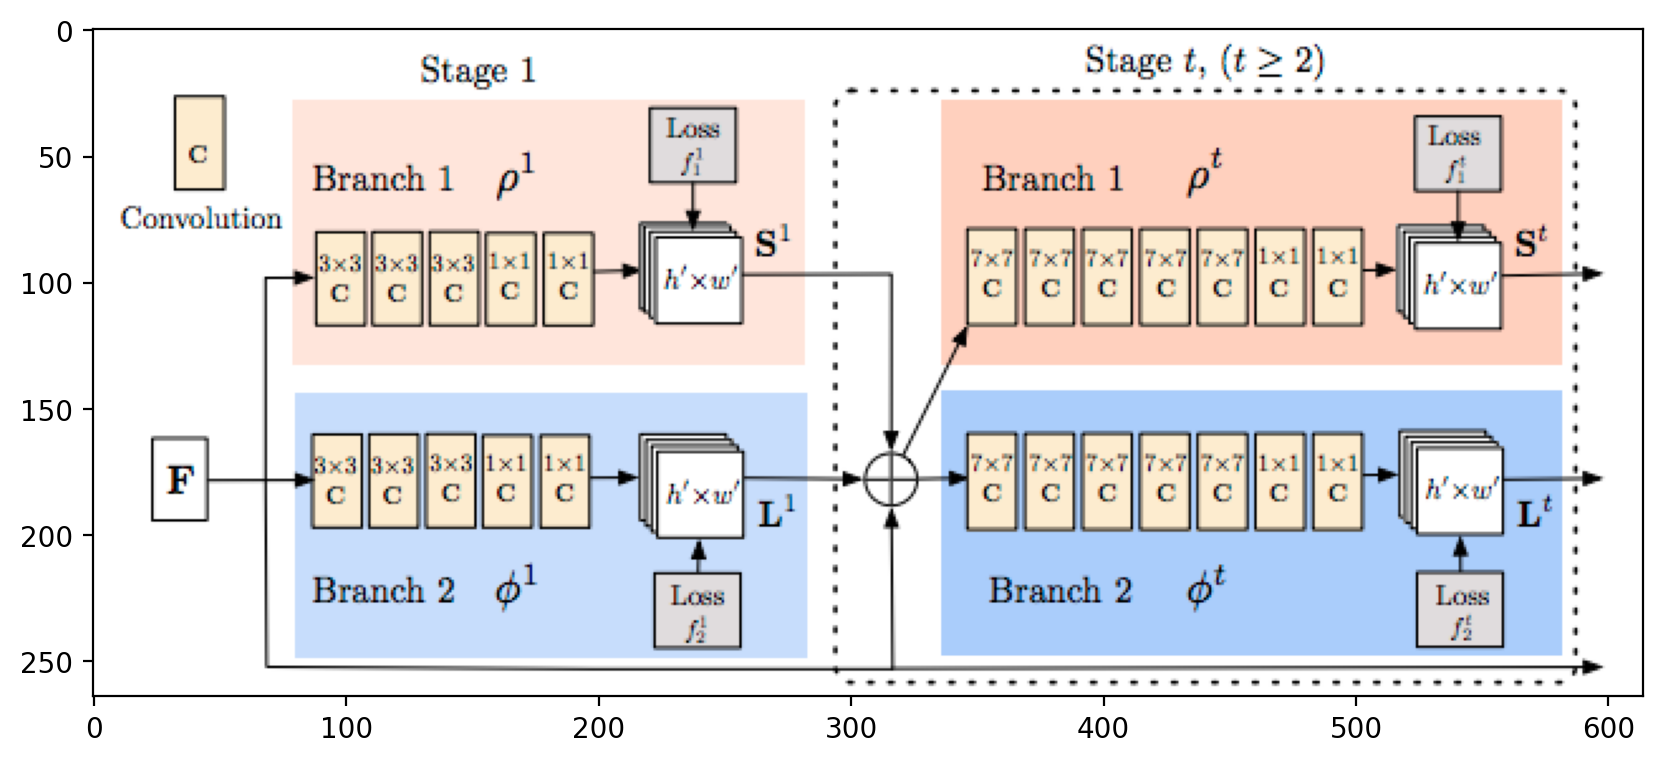

In [39]:
arch_image = '/content/drive/MyDrive/img/CNN.png'
img_ori = cv2.imread(arch_image)
plt.figure(figsize=(10, 5))
plt.imshow(img_ori[...,::-1])

In [40]:
model_pose.cuda()

# Utilize DataParallel for multi-GPU support
model_pose = torch.nn.DataParallel(model_pose, device_ids=range(torch.cuda.device_count()))

# Enable cuDNN benchmark for optimized performance
cudnn.benchmark = True


In [41]:
def estimate_pose(img_ori):
    """
    Estimate human pose from the input image using Pose Estimation model.

    Parameters:
    - img_ori (numpy.ndarray): Original image containing potential human poses.

    Returns:
    - None (Displays the original image with estimated keypoints and skeleton side by side).
    """

    # Define a set of scales for multi-scale inference
    scale_param = [0.5, 1.0, 1.5, 2.0]

    # Predict Heatmaps for approximate joint positions and Part Affinity Fields (PAF's) for limb connections
    paf_info, heatmap_info = get_paf_and_heatmap(model_pose, img_ori, scale_param)

    # Extract individual joint locations (peaks) from the predicted Heatmaps
    peaks = extract_heatmap_info(heatmap_info)

    # Extract limb connections from PAF's and identify special cases
    special_k, connection_all = extract_paf_info(img_ori, paf_info, peaks)

    # Form subsets and candidates based on the extracted connections
    subsets, candidates = get_subsets(connection_all, special_k, peaks)

    # Draw keypoints on the original image and filter out low-confidence subsets
    subsets, img_with_points = draw_key_point(subsets, peaks, img_ori)

    # Link keypoints to form a skeleton and visualize the results
    img_with_skeleton = link_key_point(img_with_points, candidates, subsets)

    # Display the original image with estimated keypoints and skeleton side by side
    plt.figure(figsize=(15, 10))

    # Original image with keypoints
    plt.subplot(1, 2, 1)
    plt.imshow(img_with_points[..., ::-1])

    # Original image with keypoints and skeleton
    plt.subplot(1, 2, 2)
    plt.imshow(img_with_skeleton[..., ::-1])


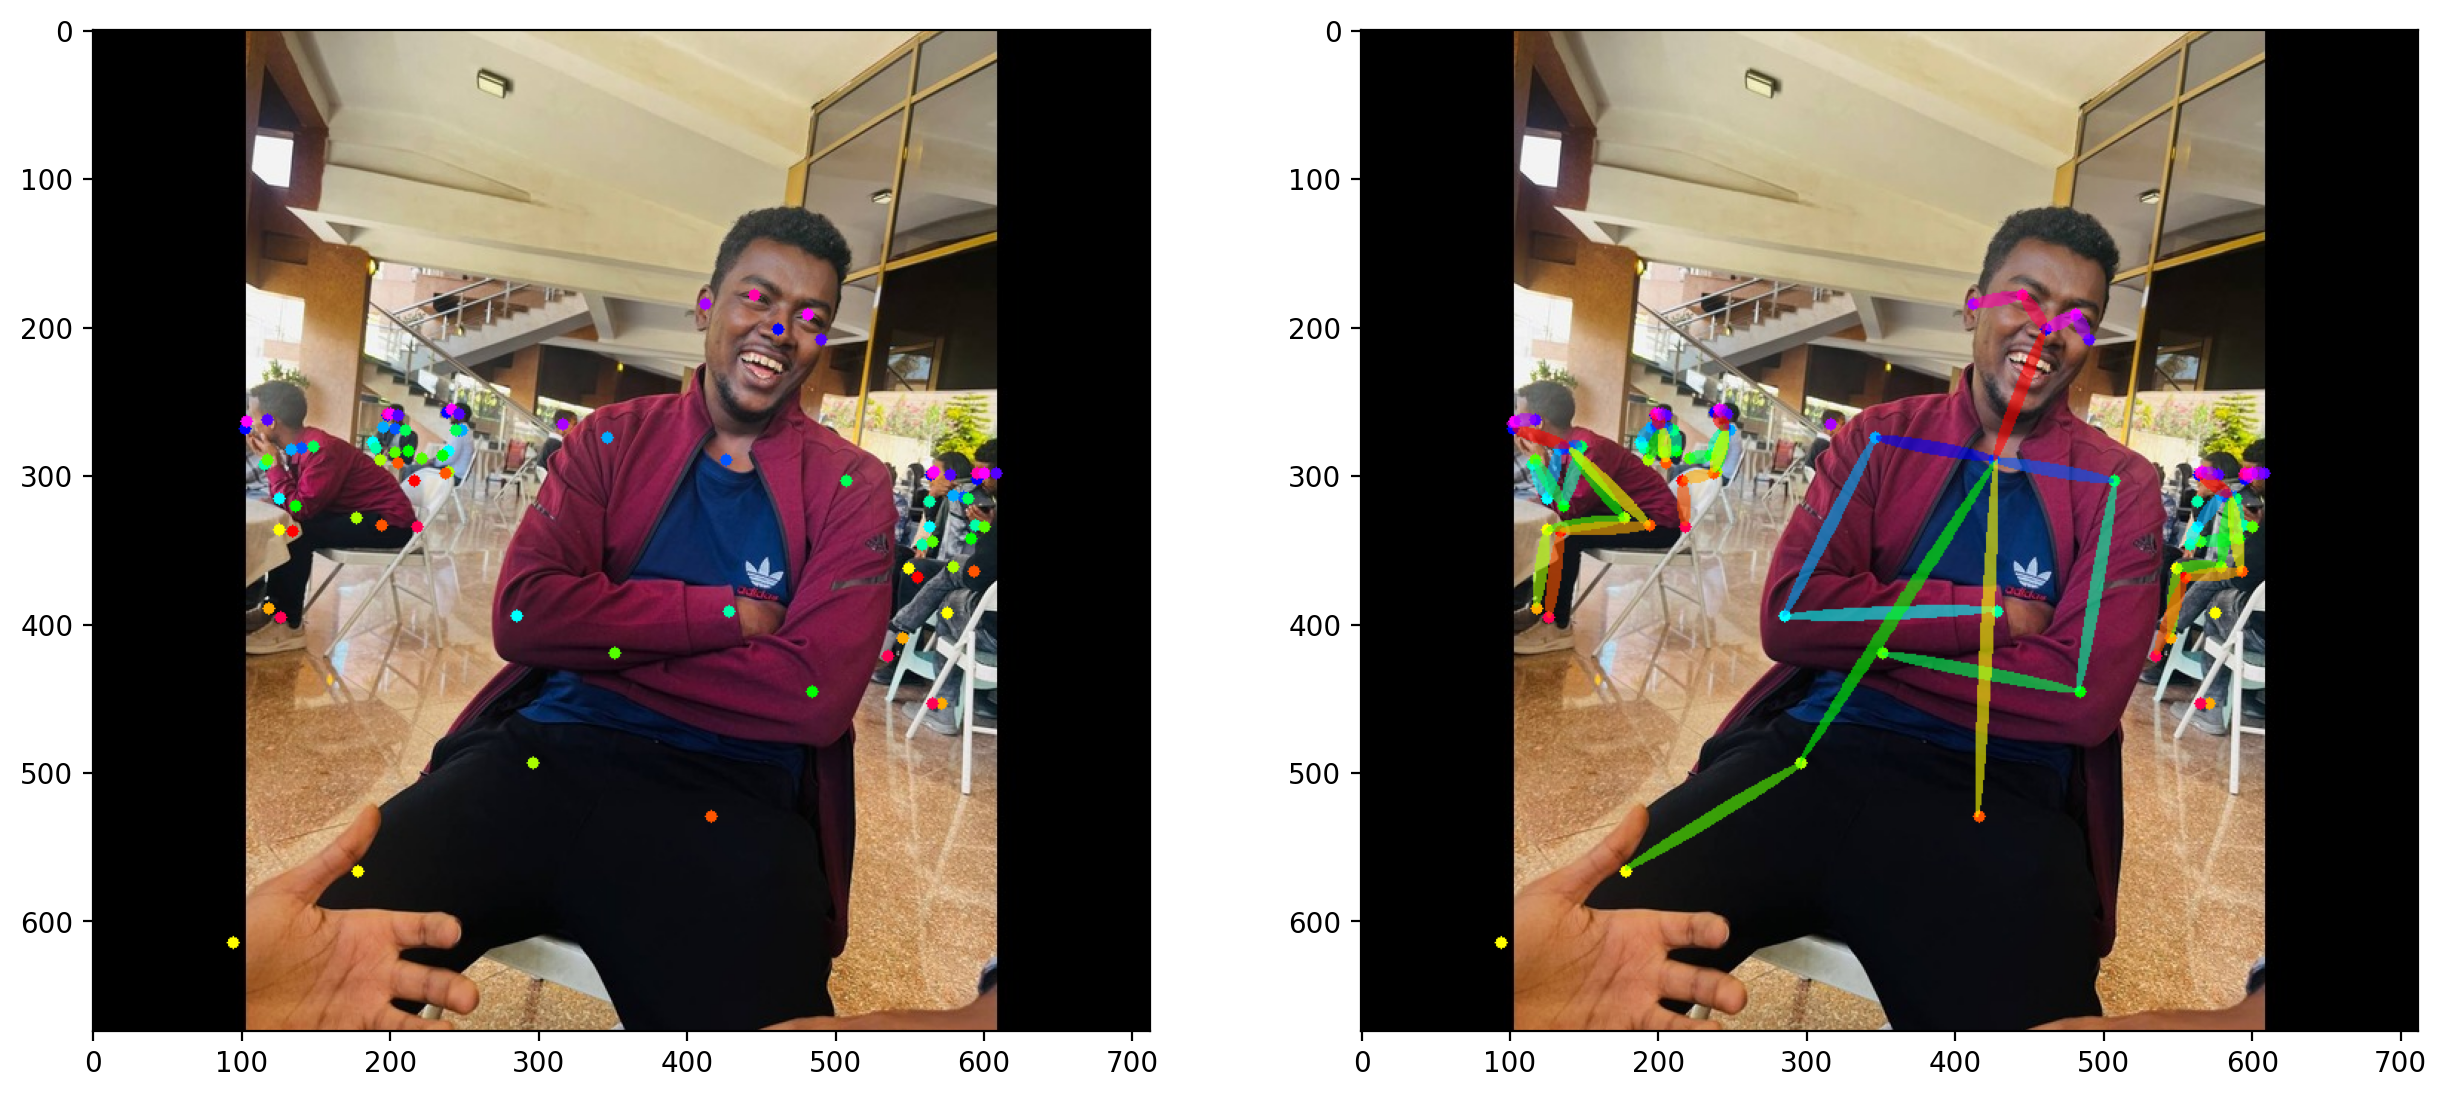

In [42]:
test_image = '/content/drive/MyDrive/img/pos (1).jpg'
img_ori = cv2.imread(test_image)
estimate_pose(img_ori)

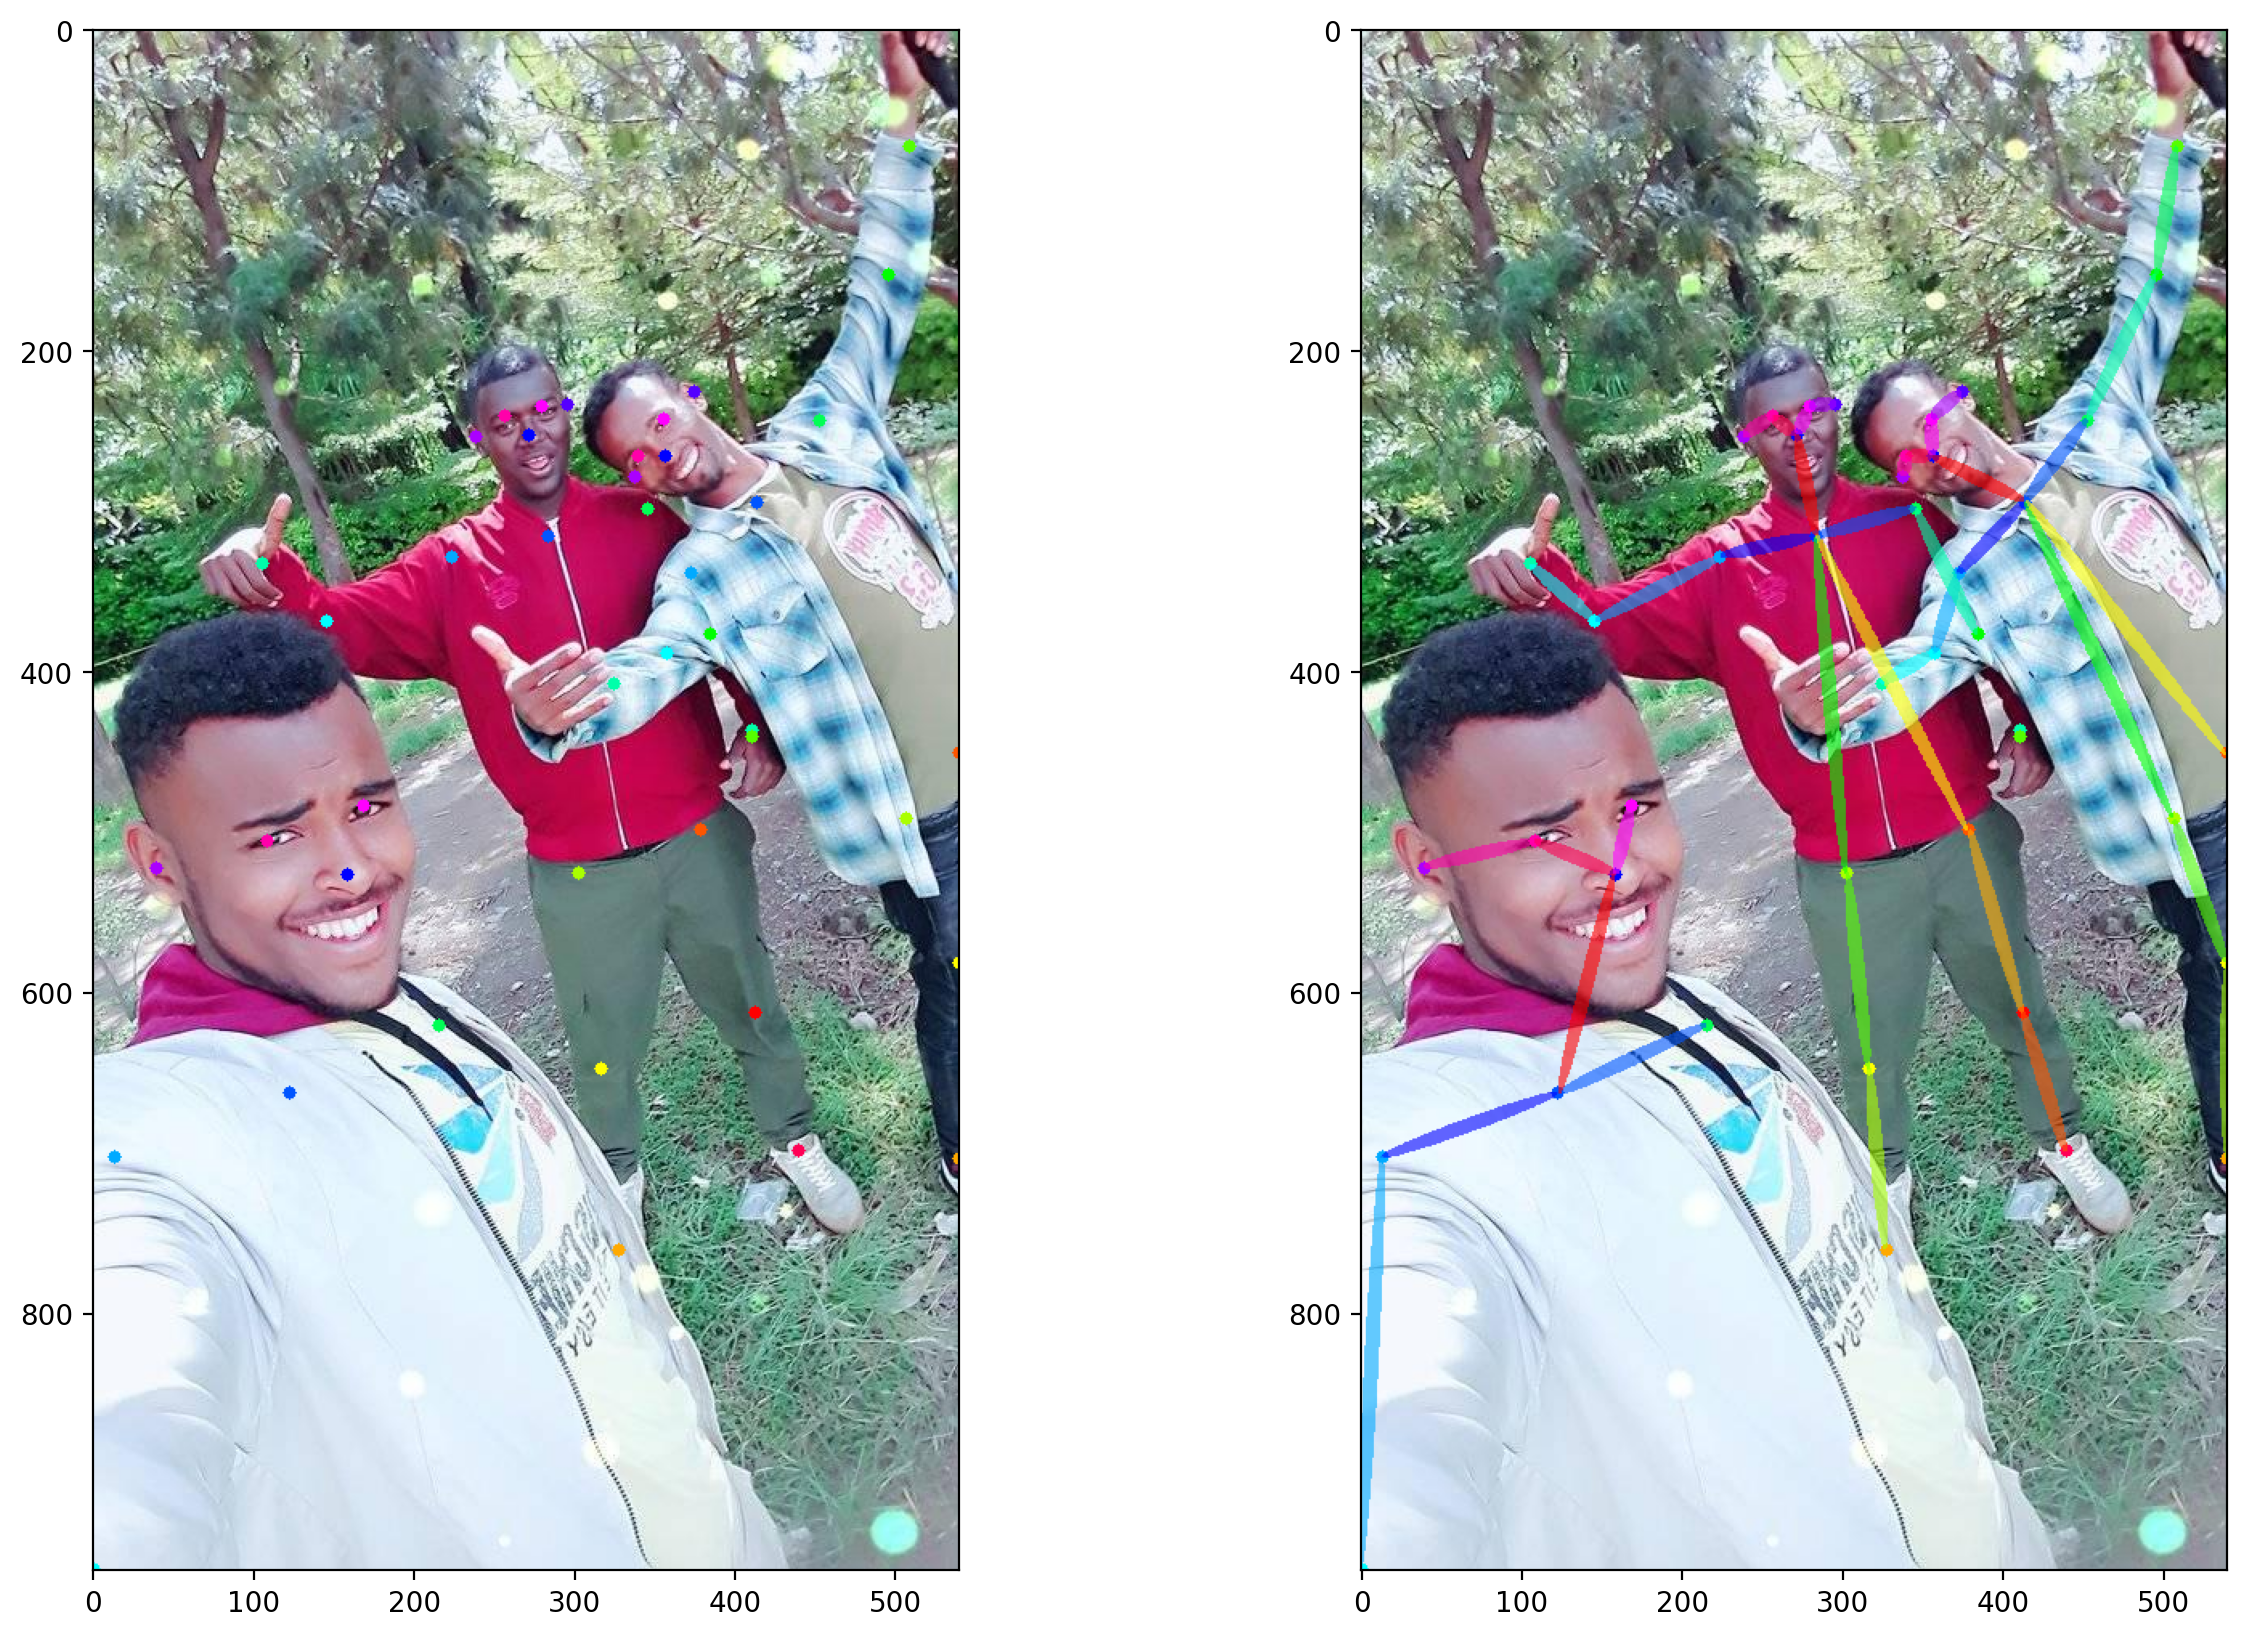

In [43]:
test_image = '/content/drive/MyDrive/img/frien.jpg'
img_ori = cv2.imread(test_image)
estimate_pose(img_ori)

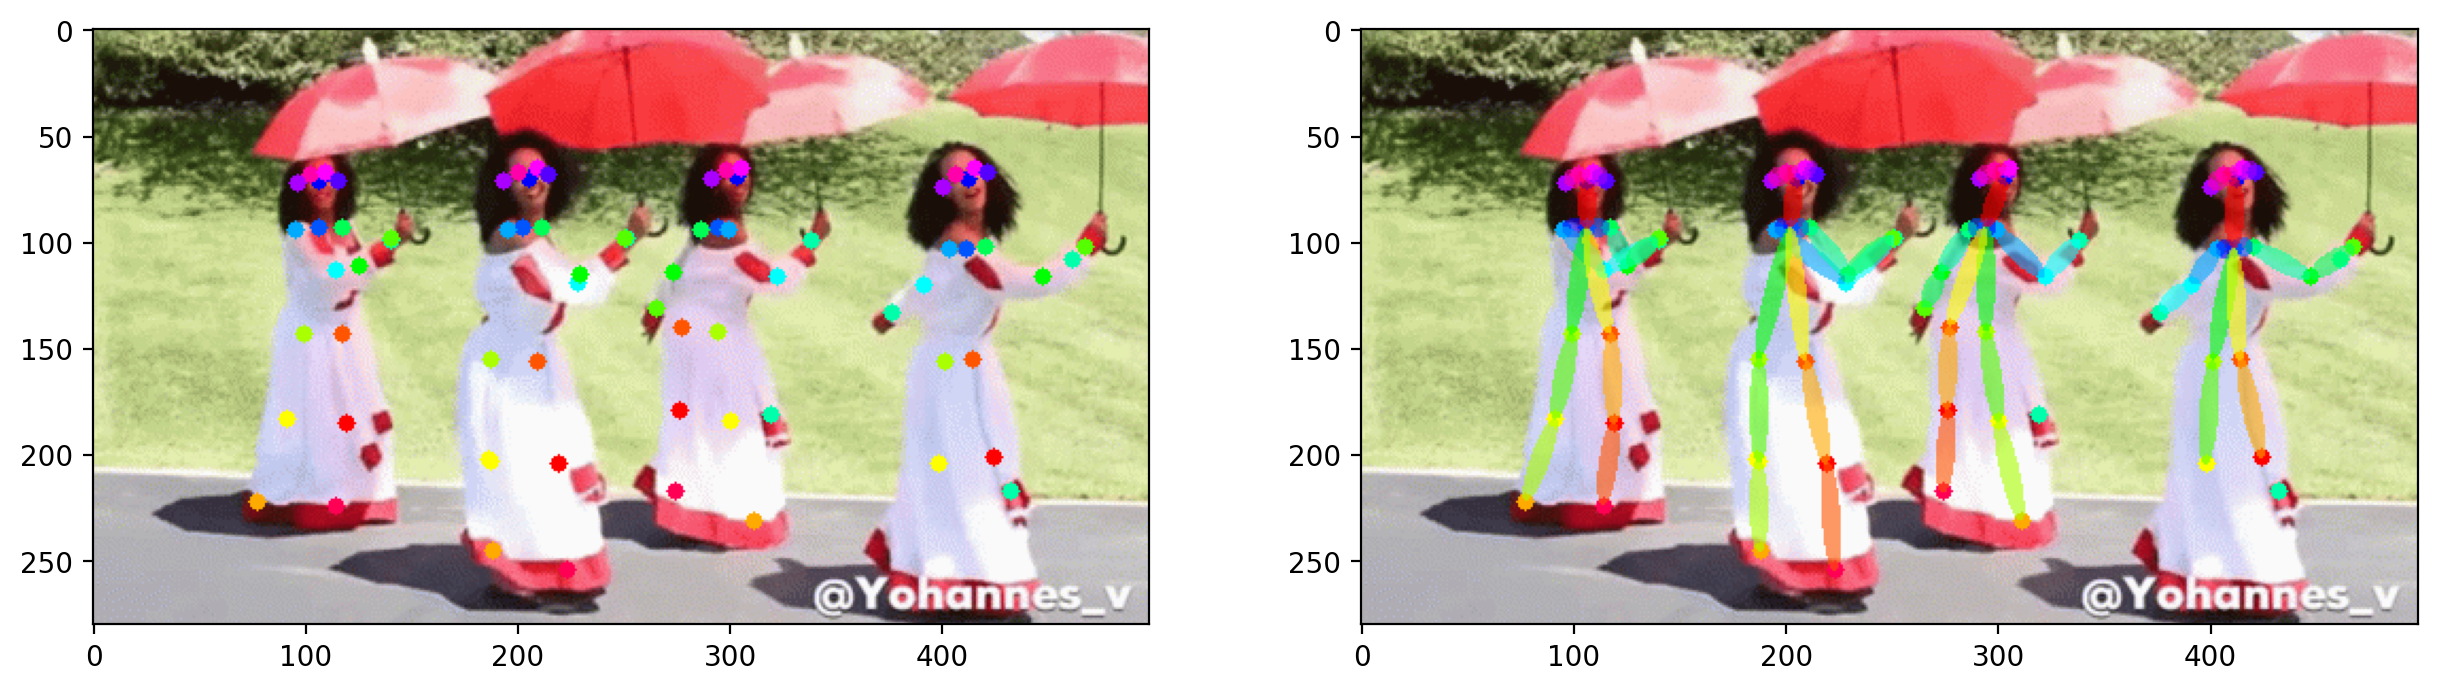

In [45]:
import imageio

# Path to the GIF file
test_image = '/content/drive/MyDrive/img/et.gif'

# Read the GIF file using imageio
gif_reader = imageio.get_reader(test_image)
# Select a specific frame, e.g., the first frame (index 0)
img_ori = gif_reader.get_data(0)

# Ensure img_ori is in the correct format (BGR)
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_RGB2BGR)

# Now you can use estimate_pose function with img_ori
estimate_pose(img_ori)


**References:**

1. **Realtime Multi-Person Pose Estimation**  
   [https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation](https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation)

2. **PyTorch Realtime Multi-Person Pose Estimation**  
   [https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation](https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation)

3. **PyTorch OpenPose**  
   [https://github.com/Hzzone/pytorch-openpose](https://github.com/Hzzone/pytorch-openpose)

4. **Lightweight Human Pose Estimation (PyTorch)**  
   [https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch](https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch)

5. **Real-time Human Pose Estimation by PyTorch**  
   [https://github.com/xuexingyu24/Real-time-human-pose-estimation-by-pytorch](https://github.com/xuexingyu24/Real-time-human-pose-estimation-by-pytorch)

6. **Kaggle: Pose Estimation**  
   [https://www.kaggle.com/code/billumillu/pose-estimation/notebook](https://www.kaggle.com/code/billumillu/pose-estimation/notebook)

These references served as valuable resources throughout the project.